In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [2]:
data = pd.read_csv('wineQualityReds.csv')
data.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Menghapus kolom pertama (Unnamed: 0) karena tidak terpakai
data = data.iloc[:,1:]
data.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1599 non-null   float64
 1   volatile.acidity      1599 non-null   float64
 2   citric.acid           1599 non-null   float64
 3   residual.sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free.sulfur.dioxide   1599 non-null   float64
 6   total.sulfur.dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


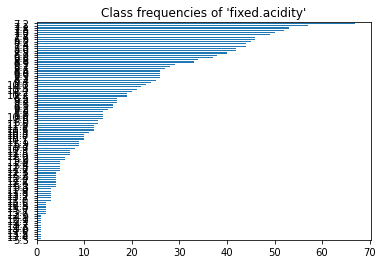

In [5]:
# Menampilkan data "fixed.acidity" secara keseluruhan

(data["fixed.acidity"].value_counts(ascending = True)
 .plot.barh()
 .set_title("Class frequencies of 'fixed.acidity'"));

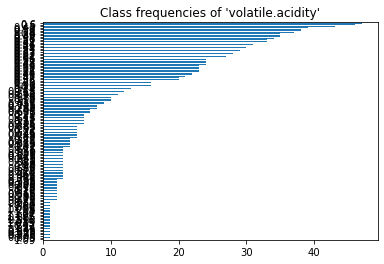

In [6]:
# Menampilkan data "volatile.acidity" secara keseluruhan

(data["volatile.acidity"].value_counts(ascending = True)
 .plot.barh()
 .set_title("Class frequencies of 'volatile.acidity'"));

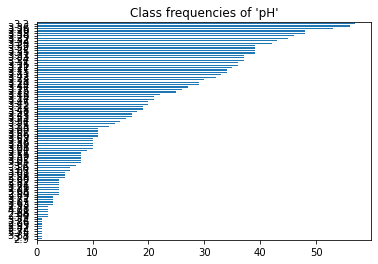

In [7]:
# Menampilkan data "pH" secara keseluruhan

(data["pH"].value_counts(ascending = True)
 .plot.barh()
 .set_title("Class frequencies of 'pH'"));

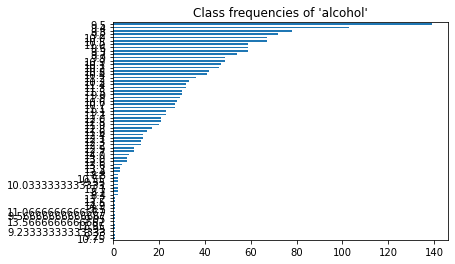

In [8]:
# Menampilkan data "alcohol" secara keseluruhan

(data["alcohol"].value_counts(ascending = True)
 .plot.barh()
 .set_title("Class frequencies of 'alcohol'"));

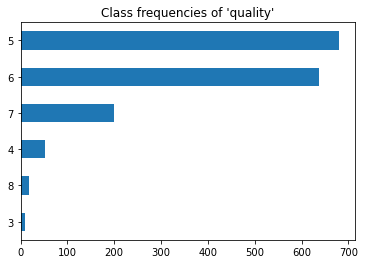

In [9]:
# Menampilkan data "quality" secara keseluruhan

(data["quality"].value_counts(ascending = True)
 .plot.barh()
 .set_title("Class frequencies of 'quality'"));

In [10]:
# menghitung koefisien korelasi pearson dari 'fixed.acidity' & 'volatile.acidity'
pearson_coef, p_value = stats.pearsonr(data['fixed.acidity'], data['volatile.acidity'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.2561308947703822  with a P-value of P = 2.2767204431782295e-25


In [11]:
# menghitung koefisien korelasi pearson dari 'pH' & 'alcohol'
pearson_coef, p_value = stats.pearsonr(data['pH'], data['alcohol'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.2056325085054983  with a P-value of P = 9.964497741464427e-17


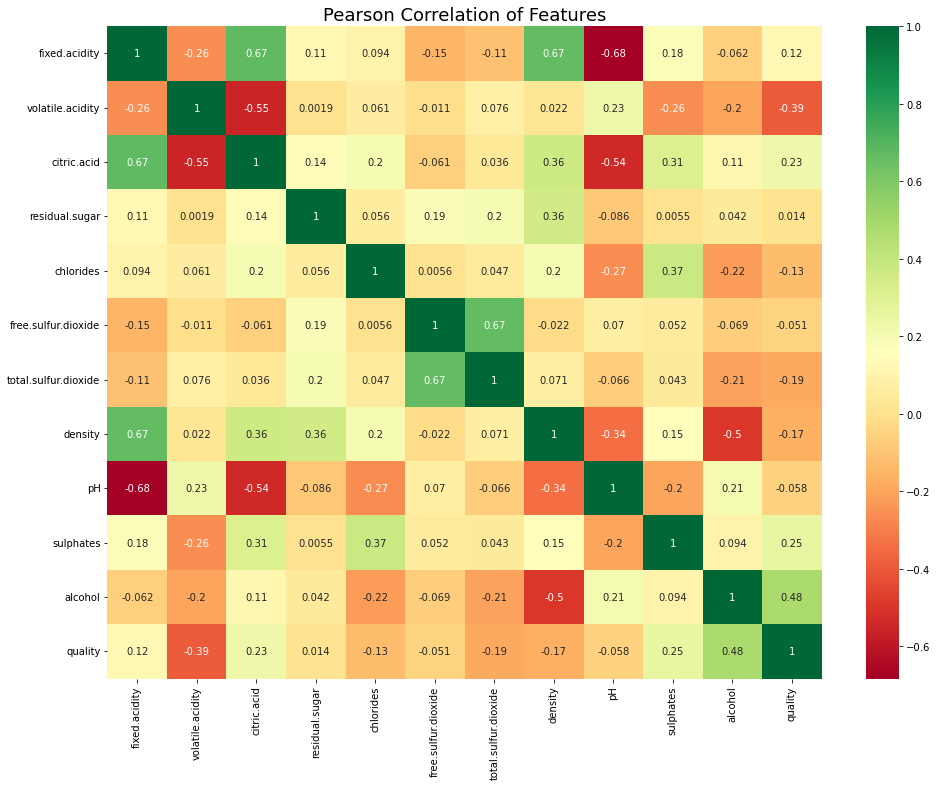

In [12]:
# Menampilan korelasi pearson secara keseluruhan
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(16,12))
plt.title("Pearson Correlation of Features", fontsize=18)
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(method="pearson"),annot=True,cmap="RdYlGn")